# First Order Optimization

## Algorithm to Compute the slope of best fit for a given data

In [59]:
# Numpy for statistical computations
from numpy import *

### This is an image for understading (not by the code)
![alt text](http://www.sthda.com/english/sthda-upload/images/machine-learning-essentials/linear-regression.png)

In [60]:
# We take any random line and try to find the error for the data with that line

# this function computes the error of given data with any line given parameters of line b,m  ( y = m * X + b)

def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [61]:
# this is the actual optimizing algorithm which tries to reduce the error from compute_error_for_line_given_points function.
#it reduces the error and make the line best fit.

# we iterate and try to find the error , the line which gives the least error is the best fit line

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # the algorithm is actually the partial derivative of the loss function with respect to parameters = 0
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

### This is an image for understading (not by the code)
![alt text](https://raw.githubusercontent.com/llSourcell/GradientDescentExample/master/gradient_descent_example.gif)

In [62]:
# This function simply calls the optimization algorithm many iterations to reduce the error
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

In [69]:
points = genfromtxt("Salary_Data.csv", delimiter=",")
learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 100000
print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))


Starting gradient descent at b = 0, m = 0, error = 6502955270.733334
After 100000 iterations b = 25445.11177415182, m = 9501.468790540643, error = 31296995.201286424


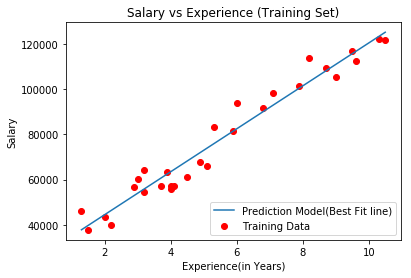

In [64]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('Salary_Data.csv')

X = df.iloc[:,:-1].values # make X data into matrix/array
# print("X=\n",X)

y = df.iloc[:,-1].values # make y data into matrix/array
# print("y=\n",y)

plt.scatter(X, y, color='red')
plt.plot(X, m*X+b)
plt.legend(('Prediction Model(Best Fit line)','Training Data'), loc='lower right')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Experience(in Years)')
plt.ylabel('Salary')
plt.show()

In [65]:
# by adjusting value of learning rate and number of iteration we can get the most optimistic model for our data.

#predicting for the model

toPredict = 13.5

Predicted_Salary = toPredict * m + b
print('Predicted Salary for {} years experience = {}'.format(toPredict,Predicted_Salary))

Predicted Salary for 13.5 years experience = 153714.9404464505
